Analyse properties of the particle's positions.

In [1]:
import numpy as numpy
import xarray as xr
from pathlib import Path
import numpy as np
from scipy.spatial.distance import pdist
from matplotlib import pyplot as plt

import sys
sys.path.append(str(Path.cwd().parent))
import heisensim as sim
import scripts.positions as poslib
PATH = Path.cwd().parent

In [2]:
data1 = poslib.load_positions(PATH, "sphere", 15)
data2 = poslib.load_positions(PATH, "box"   , 15)

In [3]:
def distances(data):
    N = len(data.particle)
    result = xr.DataArray(np.zeros((len(data.r_bl), len(data.disorder_realization), (N*(N-1))//2), dtype=np.float32),
                    dims = ["r_bl", "disorder_realization", "distance"],
                    coords = {"r_bl":data.r_bl, "disorder_realization":data.disorder_realization, "distance":np.arange((N*(N-1))//2)})
    for r_bl in data.r_bl:
        for realization in data.disorder_realization:
            result.loc[r_bl, realization] = pdist(data.loc[r_bl, realization])
    return result

dists1 = distances(data1)
dists2 = distances(data2)


In [4]:
sphere_data = np.sort(np.reshape(np.asarray(dists1), (len(dists1.r_bl), -1)), axis=1)
box_data    = np.sort(np.reshape(np.asarray(dists2), (len(dists2.r_bl), -1)), axis=1)

In [6]:
len(sphere_data[0])

10500

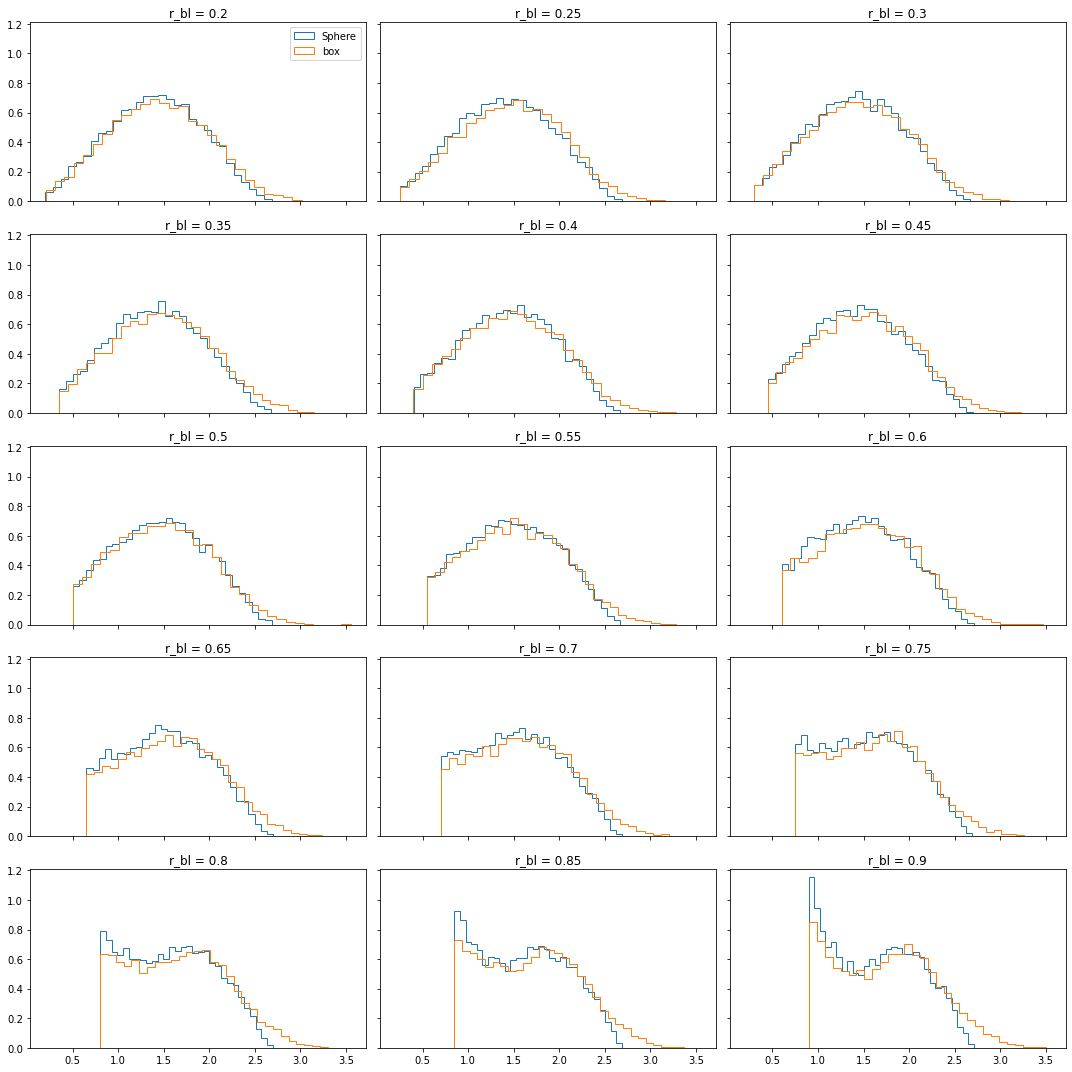

In [39]:
BINS = 30
NCOL = 3
NROW = 5
fig, axes = plt.subplots(NROW, NCOL, sharex="all", sharey="all", squeeze=False, figsize=(NROW*3, NCOL*5))

for y in range(NROW):
    for x in range(NCOL):
        axes[y,x].hist(sphere_data[y*NCOL+x], bins=BINS, histtype="step", density=True, label="Sphere")
        axes[y,x].hist(box_data[y*NCOL+x], bins=BINS, histtype="step", density=True, label="box")
        axes[y,x].set_title(f"r_bl = {float(data1.r_bl[y*NCOL+x])}")

axes[0,0].legend(loc="upper right")
fig.tight_layout()
fig.show()

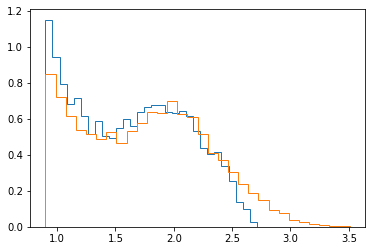

In [22]:
plt.hist(sphere_data[-1], bins=BINS, histtype="step", density=True)
plt.hist(box_data[-1], bins=BINS, histtype="step", density=True)
plt.show()

In [34]:
axes[0,0].get_children()

 Text(0.5, 1.0, 'r_bl = 0.2'),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),